In [1]:
# Training the model and test it 
#    Objectif: building a performed model with SVM algorithm 
#    Input: 
#     preprocessed data without PCA and best parameters:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#   
#   Output:
#    builded model 

#    Author: NARGES ROKNI 



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings

#Split data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Test confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve, auc

#tuning parameters
from sklearn.model_selection import RandomizedSearchCV

#subplot
from pylab import *

#warning ignore
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Accuracy
from sklearn.metrics import precision_recall_fscore_support

In [28]:
######################################   LOAD unbalanced PCA DATA:   ################################

X_train_pca = np.genfromtxt('../../data/pca/x_pca_train.csv', delimiter=',')
X_test = np.genfromtxt('../../data/pca/x_pca_test.csv', delimiter=',')
Y_train=np.genfromtxt('../../data/y_train.csv', delimiter=',')
Y_test=np.genfromtxt('../../data/y_test.csv', delimiter=',')
X_train_pca.shape

(1660852, 4)

In [23]:
X_train=X_train_pca[:10000]
Y_train=Y_train[:10000]
X_train.shape

(10000, 4)

In [3]:
####################################    BUILDING MODEL     ################################
######################################  Functions ######################################

import itertools

def drawConfusionMatrix(cm, ax):
    labels = ['Not Fraud', 'Fraud']
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    ax.set_title("Confusion Matrix")



def drawAUC(fpr,tpr,roc_auc,ax):
    ax.plot(fpr, tpr, color='grey', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    ax.grid()

def drawDecisionBoundary(model,x,y):
    print("Draw decision boundary for multidimension")
    
def printModel(model,x,y, y_pred):
    
    print('Percent Accuracy: {:.3f}% \n'.format(model.score(x, y)*100))
    
    CM = confusion_matrix(y, y_pred)
    CR=  classification_report(y, y_pred)
    FPR, TPR, thresholds=roc_curve(y, y_pred)
    AUC= auc(FPR, TPR)
    
    results = {"Confusion Matrix":CM,"Classification Report":CR,"Area Under Curve":AUC}
    
    for m in results:
        print(m,": \n",results[m],"\n")
    
    f, ax = plt.subplots(1,2,figsize=(15,5))
    drawConfusionMatrix(CM, ax[0])
    drawAUC(FPR,TPR,AUC,ax[1])
    plt.show()
    

def runModel(name, model, trainX, trainY, testX, testY):
    
    print('=' * 20, name, '=' * 20)
    start_time = time.time()
    for i in 1..160:
        x=10000*i
        y=
        model.partial_fit(trainX[:x], trainY[:x])
    print("--- Model Fitting in %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    y_pred = model.predict(testX)
    print("--- Model Predicting in %s seconds ---" % (time.time() - start_time))
    print("\n\n")
    printModel(model, testX, testY, y_pred)
    
    
    #plot_decision_boundary(model, X=trainX, Y=trainY)
    
    
  

==================== SVM linear ====================
--- Model Fitting in 0.4843630790710449 seconds ---
--- Model Predicting in 1.2187025547027588 seconds ---



Percent Accuracy: 99.691% 

Confusion Matrix : 
 [[1103768     216]
 [   3206      46]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       0.18      0.01      0.03      3252

avg / total       0.99      1.00      1.00   1107236
 

Area Under Curve : 
 0.5069747432209607 



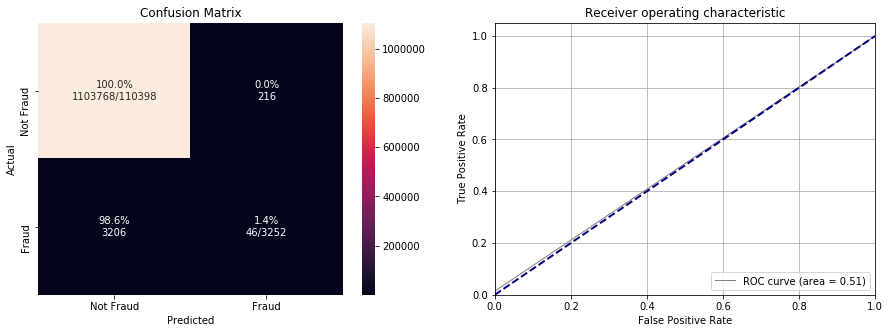

In [14]:
################################ Train and Test Models #############################
#################################   Linear SVM PCA   #############################

####### Before tuning

classifier = SVC(kernel = 'linear', random_state = 0)
runModel('SVM linear', classifier, X_train, Y_train, X_test, Y_test)


In [18]:
################################Tuning parameters####################

# Applying K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10) # vector
accuracies.mean()
accuracies.std() # standard deviation

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
               {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001]}
               ]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('best_parameters :',best_parameters)

best_parameters : {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


==================== SVM linear ====================
--- Model Fitting in 0.4062378406524658 seconds ---
--- Model Predicting in 2.82802152633667 seconds ---



Percent Accuracy: 99.539% 

Confusion Matrix : 
 [[1102099    1885]
 [   3222      30]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       0.02      0.01      0.01      3252

avg / total       0.99      1.00      0.99   1107236
 

Area Under Curve : 
 0.5037588199845027 



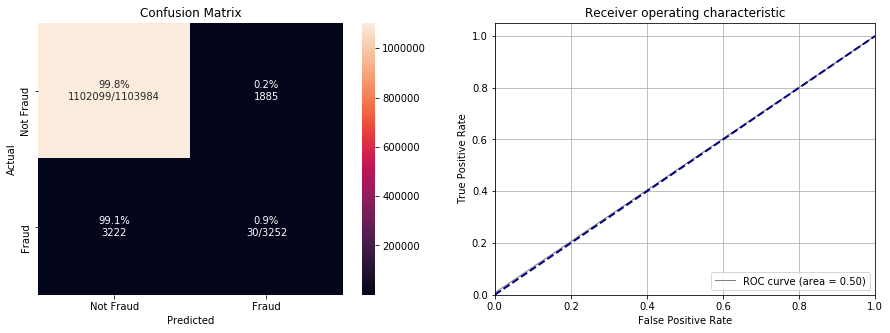

In [21]:
################################ Train and Test Models #############################
#################################   Linear SVM PCA   #############################

####### After tuning

classifier = SVC(kernel = 'rbf', random_state = 0, C=1000, gamma=0.01)
runModel('SVM linear', classifier, X_train, Y_train, X_test, Y_test)


In [ ]:
################################ Train and Test Models #############################
#################################   LogisticRegression PCA   #############################


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
runModel('Logistic regression', classifier, X_train, Y_train, X_test, Y_test)

In [ ]:
################################ Train and Test Models #############################
#######################Visualising the Training set results#######################

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.25, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

    
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()
plt.show()

In [ ]:
################################ Train and Test Models #############################
####################### Visualising the Test set results #######################
# 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()